In [1]:
'''
In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.
Dataset description : This dataset was derived and simplified for learning purposes. 
It includes usage behaviour of about 9000 active credit card holders during 6 months period.
This case requires to develop a customer segmentation to define marketing strategy.'''

"\nIn this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.\nDataset description : This dataset was derived and simplified for learning purposes. \nIt includes usage behaviour of about 9000 active credit card holders during 6 months period.\nThis case requires to develop a customer segmentation to define marketing strategy."

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Credit_card_dataset.csv')
data.sample(3)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
7104,C17296,0.181818,74.00,68.147484,6000.0,0.000000
6934,C17123,1.000000,0.00,263.793622,1200.0,119.746155
3587,C13688,0.818182,849.57,886.592905,4000.0,0.000000


# UNDERSTANDING MY DATASET 

In [5]:
data.head(3)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000


In [6]:
data.tail(3)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778
8949,C19190,0.666667,1093.25,63.165404,1200.0,127.040008


In [7]:
data.shape

(8950, 6)

In [8]:
data.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [10]:
data.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

# EDA

In [12]:
data.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

Text(0, 0.5, 'FREQUENCY')

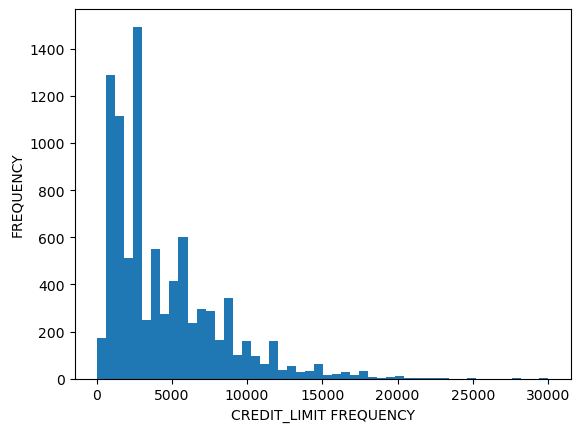

In [13]:
# UNIVARIETE ANALYSIS
plt.hist(data['CREDIT_LIMIT'],bins=50)
plt.xlabel("CREDIT_LIMIT FREQUENCY")
plt.ylabel("FREQUENCY")

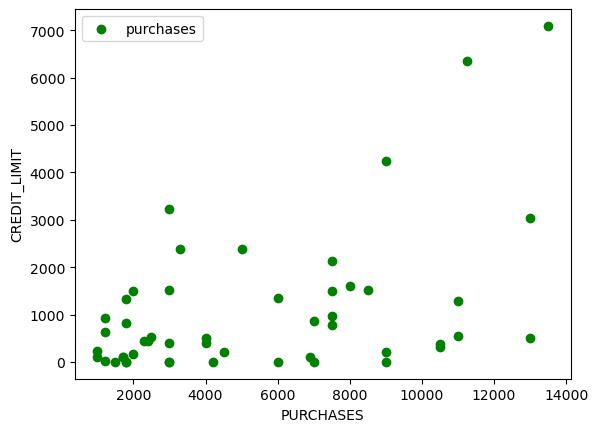

In [14]:
# BIVARIATE ANALYSIS
plt.scatter(data['CREDIT_LIMIT'][:50],data.PURCHASES[:50],marker="o",color="green",label = "purchases")
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.legend()

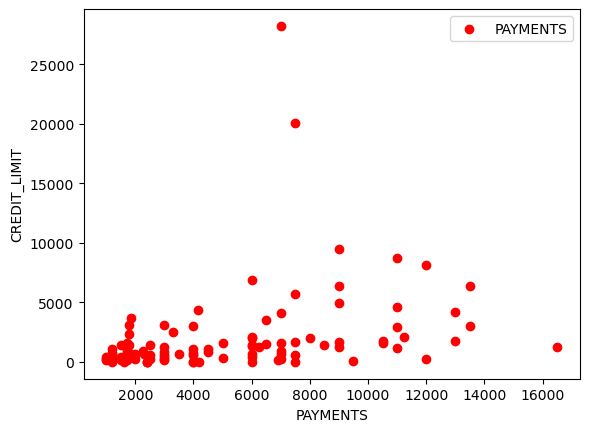

In [15]:
# plt.scatter(data['CREDIT_LIMIT'][:50],data.PURCHASES[:50],marker="o",color="green",label = "purchases")
plt.scatter(data['CREDIT_LIMIT'][:100],data.PAYMENTS[:100],marker="o",color="r",label="PAYMENTS")
# plt.scatter(data['BALANCE_FREQUENCY'],data.CREDIT_LIMIT,marker="o",color="blue")
plt.xlabel("PAYMENTS")
plt.ylabel("CREDIT_LIMIT")
plt.legend()

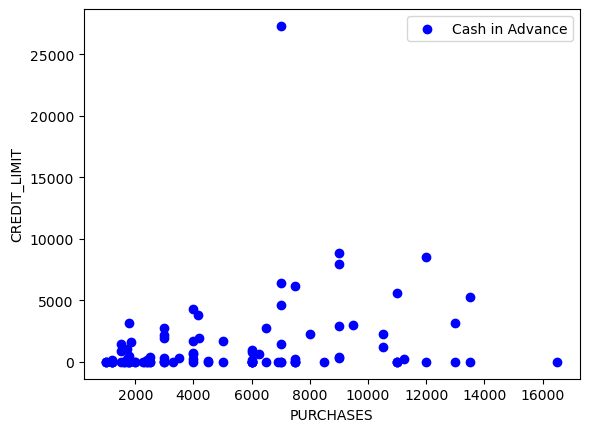

In [16]:
plt.scatter(data['CREDIT_LIMIT'][:100],data.CASH_ADVANCE[:100],marker="o",color="blue",label="Cash in Advance")
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.legend()

# FEATURE ENGINEERING 

In [18]:
# DATA CLEANING 

In [19]:
data.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

In [20]:
data.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [42]:
data.dropna() # droping the empty cells 

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [56]:
data['CUST_ID'].duplicated().sum() # checking for the duplicated columns in my dataset 

0

In [ ]:
# outliers in the data set
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# check for outliers in the credit card limit 

In [72]:
frequency_gretaer_1 = data[data['BALANCE_FREQUENCY']>1] # get the values that are greter than 1 in the column
len(frequency_gretaer_1)

0

In [90]:
q1 = data['CREDIT_LIMIT'].quantile(0.25)
q3 = data['CREDIT_LIMIT'].quantile(0.75)

IQR = q3-q1
print (f"the q1 is {q1}")
print (f"the q2 is {q3}")
print (f"the IQR is {IQR}")

lower_limit = q1-1.5*(IQR)
upper_limit = q3+1.5 * (IQR)

print (f"the lower limit is {lower_limit}")
print (f"the upper limit  is {upper_limit}")
outliers = data[(data["CREDIT_LIMIT"]<lower_limit) | (data["CREDIT_LIMIT"]>upper_limit)]
print (f"the number of outliers is {len(outliers)}")
filtered_data = data[(data["CREDIT_LIMIT"]>= lower_limit) & (data["CREDIT_LIMIT"] <= upper_limit)]

the q1 is 1600.0
the q2 is 6500.0
the IQR is 4900.0
the lower limit is -5750.0
the upper limit  is 13850.0
the number of outliers is 248


In [94]:
filtered_data.shape

(8701, 6)

In [98]:
data2 = filtered_data.copy()

In [104]:
# FETURE SELECTION 
from sklearn.model_selection import train_test_split
# xtrain,xtest,ytain,ytest = train_test_split()
from sklearn.feature_selection import VarianceThreshold 

In [130]:
def varience(dataset,threshold):
    get_variance = VarianceThreshold(threshold=threshold)
    get_variance.fit(dataset)
    return pd.Series(get_variance.get_support(),index=dataset.columns)

In [135]:
varience(data2.drop(columns=['CUST_ID']),0.1)

BALANCE_FREQUENCY    False
PURCHASES             True
PAYMENTS              True
CREDIT_LIMIT          True
CASH_ADVANCE          True
dtype: bool

In [141]:
data2.BALANCE_FREQUENCY[:5] # BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

0    0.818182
1    0.909091
2    1.000000
3    0.636364
4    1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [ ]:
# Highly correwlated features in my dataset can imply the same thing especialy when its posituve correlation ()

<Axes: title={'center': 'CORRELATIONS'}>

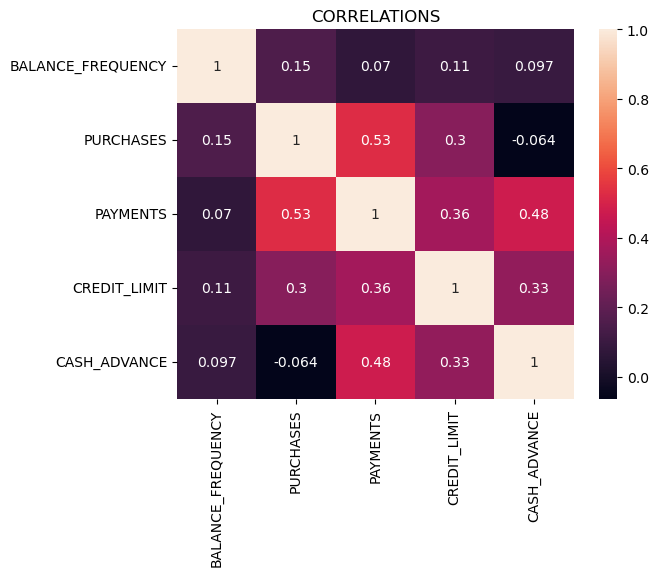

In [147]:
import seaborn as sns
plt.title("CORRELATIONS")
sns.heatmap(data2.select_dtypes(exclude='object').corr(),annot=True)

# CLUSTERING ALGORITHMS TO GET THE DIFFERENT CLUSTERS LABELS 

In [ ]:
# NOTE :-  We perform clusters to get the labels (Target)

In [157]:
data2.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

In [152]:
# KMEANS CLUSTERING ALGORITHMS 
from sklearn.cluster import KMeans,AgglomerativeClustering
# Perform partitional clustering using the K-means algorithm. Then, plot the clusters

In [279]:
clusters = AgglomerativeClustering(n_clusters=2,metric='euclidean')
clusters.fit(data2[['PURCHASES','CREDIT_LIMIT']].iloc[:100])

AgglomerativeClustering()

In [282]:
labels = clusters.labels_[:100]
np.unique(labels) # you realise that the model only generated 2 unique lables 

array([0, 1], dtype=int64)

In [263]:
parameters = clusters.get_params()
parameters

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 2}

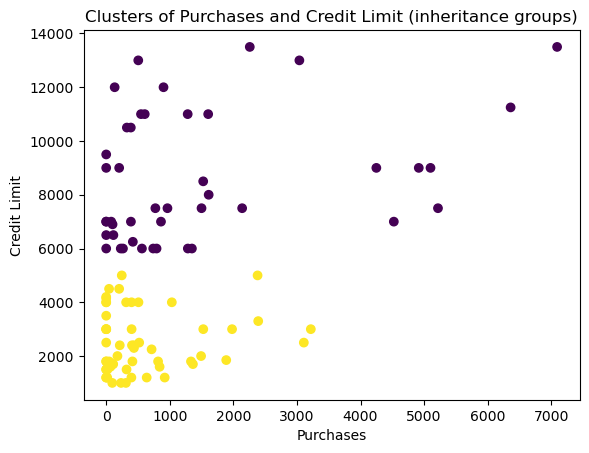

In [284]:
plt.scatter(data2['PURCHASES'].iloc[:100], data2['CREDIT_LIMIT'].iloc[:100], c=labels[:100], cmap='viridis')
# plt.scatter(data2['PAYMENTS'], data2['CREDIT_LIMIT'], c=labels, cmap='viridis')
plt.title('Clusters of Purchases and Credit Limit (inheritance groups)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
# plt.legend()
plt.show()

In [292]:
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
# Perform partitional clustering using the K-means algorithm. Then, plot the clusters

In [341]:
kmeans_clusters = KMeans(n_clusters=2,random_state=100)
kmeans_clusters.fit(data2[['PURCHASES','CREDIT_LIMIT']].iloc[:100])

KMeans(n_clusters=2, random_state=100)

In [343]:
labels = kmeans_clusters.labels_
labels

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [326]:
SSE = []
k_range = range(1,10)
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=100)
    kmeans.fit(data2[['PURCHASES','CREDIT_LIMIT']].iloc[:100])
    SSE.append(kmeans.inertia_)

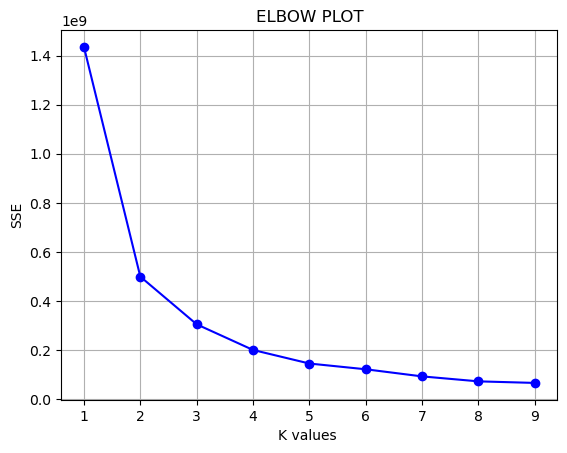

In [337]:
# Elbow plot 
plt.plot(k_range,SSE,c='blue',marker='o')
plt.xlabel("K values ")
plt.ylabel("SSE")
plt.title("ELBOW PLOT")
plt.grid()

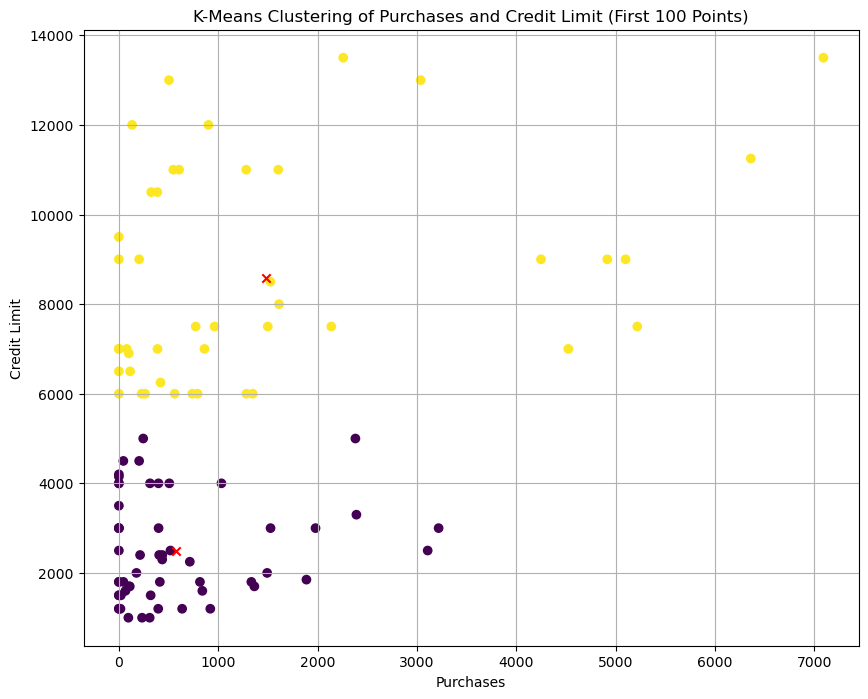

In [345]:
plt.figure(figsize=(10, 8))
# Plotting the first 100 points
plt.scatter(data2['PURCHASES'][:100], data2['CREDIT_LIMIT'][:100], c=labels[:100], cmap='viridis', marker='o')
plt.scatter(kmeans_clusters.cluster_centers_[:, 0], kmeans_clusters.cluster_centers_[:, 1], c='red', marker='x')  # Plotting centroids
plt.title('K-Means Clustering of Purchases and Credit Limit (First 100 Points)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.grid()
plt.show()

# Interpret the results

In [ ]:
# from the algorithms above Hirrachial model is better in this case because we dont know the number of clusters that we have in this case despite both of the having the same output 


# 2. the model shows that the best labels we have is 0 and 1 we can only establish to clusters from the samples 

In [368]:
# testing the model algorithm
'''
from the dataset the first input was :
  CUST_ID	    BALANCE_FREQUENCY	PURCHASES	PAYMENTS	CREDIT_LIMIT	CASH_ADVANCE
0    C10001	    0.818182	        95.40	     201.802084	  1000.0	     0.000000 
1	 C10002  	0.909091	        0.00	    4103.032597	  7000.0	     6442.945483
6934 C17123	    1.000000	        0.00	    263.793622	  1200.0	     119.746155
'''

# according to this we want to predict the customer label of this customer will be ? basing on the PURCHASES COLUMN AND CREDIT_LIMIT
print(f"the first {kmeans_clusters.predict([[95,1000]])}") # 1st
print(f"the 2nd client {kmeans_clusters.predict([[95,1000]])}") # second
print(kmeans_clusters.predict([[0,1200]]) )# the customer 6934

the first [0]
the 2nd client [0]
[0]


In [ ]:
# so the customers we can classify him as cluster 0 